In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, date

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_columns', None)

#### Tweet Frequency Analysis

In [3]:
df = pd.read_csv('./Data-Processing/tweet.out', sep='\t', names=['twitterID', 'userID', 'label', 'twitter'])

In [13]:
userCntDf = df['userID'].value_counts().reset_index()
userCntDf.columns = ['userID', 'tweetCnt']

In [14]:
userCntDf.head(10)

,userID,tweetCnt
0,97567146,51
1,323112996,40
2,158119360,36
3,493123841,29
4,1061562434,25
5,624198613,25
6,339220082,23
7,1338597000,22
8,161729720,19
9,28094698,16


In [50]:
frequentUsers = userCntDf[userCntDf['tweetCnt'] >= 2]['userID'].tolist()

In [51]:
df.loc[df['userID'].isin(frequentUsers), 'fromFrequentUser'] = 1
df.loc[~ df['userID'].isin(frequentUsers), 'fromFrequentUser'] = 0

In [52]:
new_df = df.groupby(['fromFrequentUser', 'label'])['twitterID'].count().reset_index()

In [54]:
sns.set(style="whitegrid")

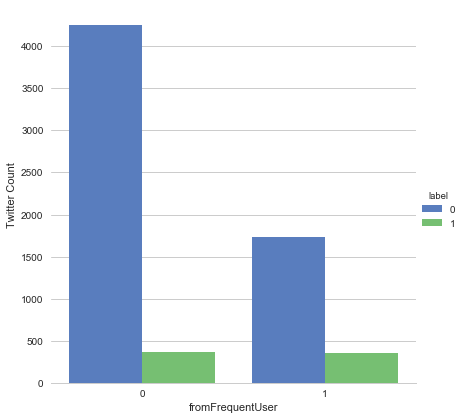

In [56]:
g = sns.factorplot(x="fromFrequentUser", y="twitterID", hue="label", data=new_df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Twitter Count")

#### Time Analysis

In [2]:
date_df = pd.read_csv('./Data-Processing/tweet_date.out', sep='\t', parse_dates=[4], header=0, names=['twitterID', 'userID', 'label', 'twitter', 'date'])

In [3]:
date_df.head()

,twitterID,userID,label,twitter,date
0,339867818843594756,246979971,0,"@DoctorChristian scared to start fluoxetine, w...",2013-05-29
1,349294537367236611,149749939,0,"@IntuitiveGal1 ok, if you stopped taking the L...",2013-06-24
2,354256195432882177,54516759,0,Novartis announces secukinumab (AIN457) demons...,2013-07-08
3,352456944537178112,1267743056,1,U wailed all night; now y'r disembodied sobbin...,2013-07-03
4,340660708364677120,135964180,1,"Not that anyone noticed, but my #ambienwithdra...",2013-05-31


In [11]:
date_df = date_df[date_df['date'].apply(lambda x: x.year == 2013)]

In [17]:
date_df['month'] = date_df['date'].map(lambda x : x.month)

In [18]:
group_df = date_df.groupby(['month', 'label'])['twitterID'].count().reset_index()

In [19]:
group_df.head()

,month,label,twitterID
0,1,0,56
1,1,1,5
2,3,0,3
3,4,0,229
4,4,1,33


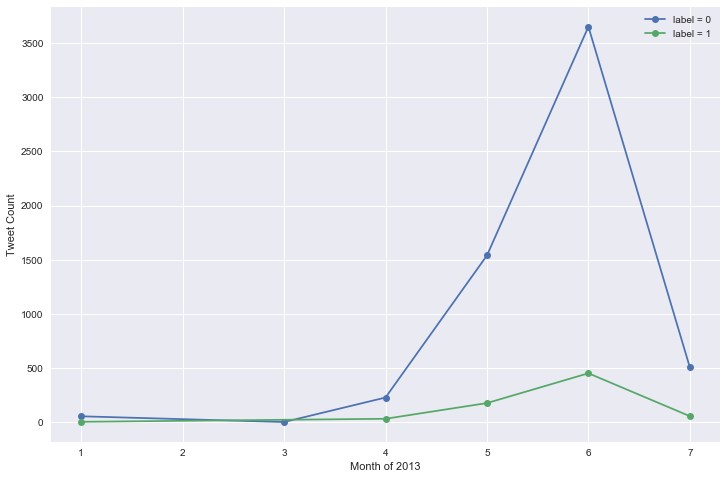

In [21]:
for i in range(2):
    x = group_df.loc[group_df['label'] == i]['month']
    y = group_df.loc[group_df['label'] == i]['twitterID']
    plt.plot(x, y, marker='o', linestyle='-', label='label = ' + str(i))

plt.xlabel('Month of 2013')
plt.ylabel('Tweet Count')
plt.legend()